In [1]:
import pickle as pckl
import numpy as np
import pandas as pd

# personal function scripts
import day_windower # only used if windowing hasn't been done
import tokenize_reviews
import extract_sentiment
import plot_reviews

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import importlib
importlib.reload(day_windower)

<module 'day_windower' from '/Users/tylerblair/Documents/insight/day_windower.py'>

In [4]:
df = pckl.load(open('ARK_data_trunc.pckl','rb'))
df.head()

,review,upvoted,time_of_review,minutes_played,upvotes,total_votes,percent_upvotes,time_of_review_unix
0,"Its really good, only down side is you cant fo...",True,2015-06-02 22:29:25,4578,1,1,1.0,1.433284e+09
1,This game manages to make you feel all sorts o...,True,2015-06-02 22:30:07,28946,2,2,1.0,1.433284e+09
2,LOVE THIS !!!!,True,2015-06-02 22:31:01,82165,3,3,1.0,1.433284e+09
3,At the point of this recommendation being made...,True,2015-06-02 22:35:36,664,4,4,1.0,1.433285e+09
4,"""Since *that game we all know of"" vanished the...",True,2015-06-02 22:36:41,43151,5,5,1.0,1.433285e+09


In [35]:
#df = df.drop(columns = ['comment_upvotes', 'comment_funny_votes', 'early_review', 'playtime_2weeks',
#                               'last_played', 'games_owned', 'author_reviews', 'purchased', 'free', 'cleaned_reviews'])

In [30]:
#pckl.dump(simple_df, open('ARK_data_trunc.pckl', 'wb'))

In [5]:
params = {'game': 'ARK',
          'window_days': 14,
          'save_df': True}
params['save_df']

True

In [6]:
#windowed_df = windowing_function2.window_df(df, game, window_days, save_df, shift)

importlib.reload(day_windower)
windowed_df = day_windower.window_df(df, params)

In [7]:
windowed_df.head()

,time_of_review,review,upvoted,time_of_review_unix,minutes_played,upvotes_window,total_window,percent_window
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,1.433284e+09,4578,1,1,1.0
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1.433284e+09,28946,2,2,1.0
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,1.433284e+09,82165,3,3,1.0
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,1.433285e+09,664,4,4,1.0
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,1.433285e+09,43151,5,5,1.0


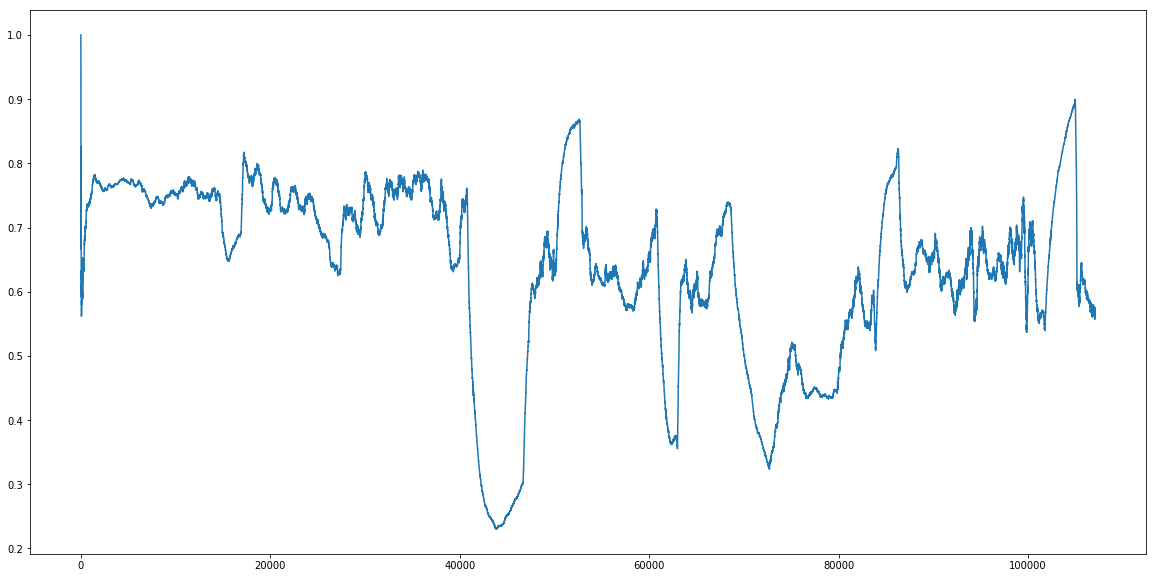

In [8]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(windowed_df['percent_window'])

In [9]:
#pckl.dump(windowed_df, open('ARK_14day_percentwindow_0128.pckl','wb'))

In [41]:
windowed_df.head()

,time_of_review,review,upvoted,time_of_review_unix,minutes_played,upvotes_window,total_window,percent_window,upvote_roc
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,1.433284e+09,4578,1,1,1.0,0.0
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1.433284e+09,28946,2,2,1.0,0.0
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,1.433284e+09,82165,3,3,1.0,0.0
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,1.433285e+09,664,4,4,1.0,0.0
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,1.433285e+09,43151,5,5,1.0,0.0


In [240]:
import importlib
importlib.reload(day_windower)

<module 'day_windower' from '/Users/tylerblair/Documents/insight/day_windower.py'>

In [11]:
sents = pckl.load(open('ARK_sentiment_df.pckl','rb'))
sents.columns

Index(['time_of_review', 'review', 'upvoted', 'time_of_review_unix',
       'minutes_played', 'upvotes_window', 'total_window', 'percent_window',
       'upvote_roc', 'neu_sent', 'neg_sent', 'pos_sent', 'comp_sent'],
      dtype='object')

In [12]:
#windowed_df['neu_sent'] = sents['neu_sent']
#windowed_df['neg_sent'] = sents['neg_sent']
#windowed_df['pos_sent'] = sents['pos_sent']
#windowed_df['comp_sent'] = sents['comp_sent']

In [15]:
#pckl.dump(windowed_df, open('ARK_14day_per_and_sents.pckl','wb'))

In [4]:
sentiment_df = extract_sentiment.raw_sentiment(windowed_df)

NameError: name 'df' is not defined

In [78]:
importlib.reload(day_windower)

<module 'day_windower' from '/Users/tylerblair/Documents/insight/day_windower.py'>

In [28]:
sentiment_window_no_norm = day_windower.sent_window(sentiment_df, params)

<class 'int'>


In [29]:
sentiment_window_no_norm.columns

Index(['time_of_review', 'review', 'upvoted', 'time_of_review_unix',
       'minutes_played', 'upvotes_window', 'total_window', 'percent_window',
       'neu_sent', 'neg_sent', 'pos_sent', 'comp_sent', 'neu_window',
       'neg_window', 'pos_window', 'comp_window'],
      dtype='object')

In [38]:
columns = ['percent_window', 'neu_window', 'neg_window', 'pos_window', 'comp_window']

In [30]:
#pckl.dump(sentiment_window_no_norm,open('ARK_14day_all_but_roc_no_sent_norm.pckl','wb'))

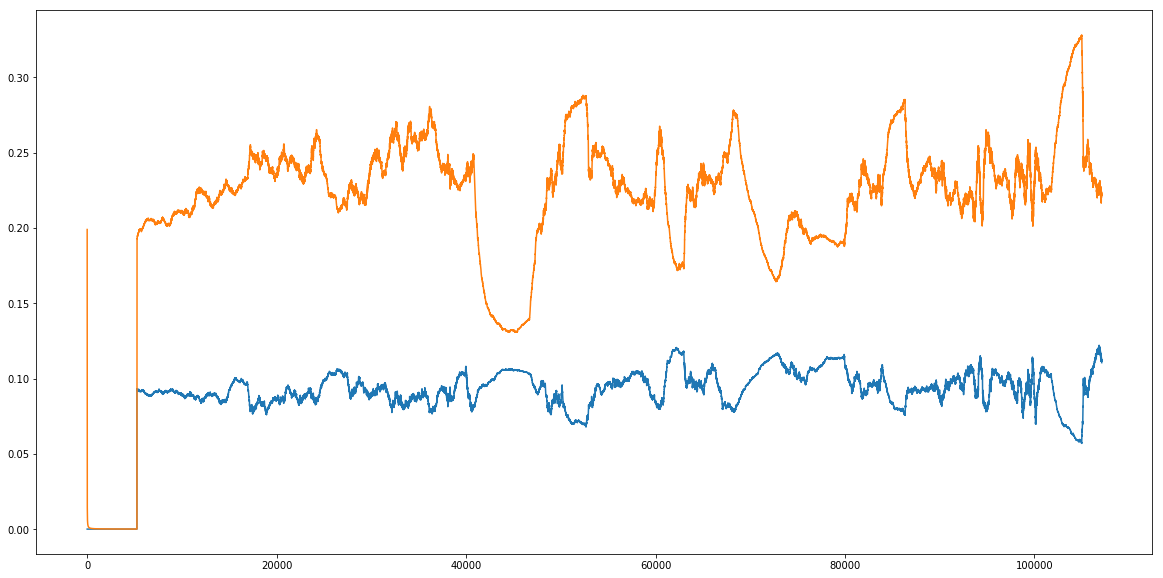

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
x = pd.Series(range(len(sentiment_window_no_norm)))

ax.plot(x, sentiment_window_no_norm['neg_window'], x, sentiment_window_no_norm['pos_window'])

In [39]:
roc_df = day_windower.deriv_window(sentiment_window_no_norm, params, columns)

In [40]:
roc_df.columns

Index(['time_of_review', 'review', 'upvoted', 'time_of_review_unix',
       'minutes_played', 'upvotes_window', 'total_window', 'percent_window',
       'neu_sent', 'neg_sent', 'pos_sent', 'comp_sent', 'neu_window',
       'neg_window', 'pos_window', 'comp_window', 'percent_window_roc',
       'neu_window_roc', 'neg_window_roc', 'pos_window_roc',
       'comp_window_roc'],
      dtype='object')

In [41]:
#pckl.dump(roc_df,open('ARK_14day_no_forecast_or_delta.pckl','wb'))

In [68]:
days = [1]

In [45]:
FULL_df = day_windower.forecast(roc_df, days)
FULL_df.columns

In [80]:
#pckl.dump(FULL_FULL_df2, open('ARK_14day_FULL2.pckl','wb'))

In [79]:
FULL_FULL_df2 = day_windower.delta_percent(FULL_df,days)

In [82]:
df.columns

Index(['time_of_review', 'review', 'upvoted', 'time_of_review_unix',
       'minutes_played', 'upvotes_window', 'total_window', 'percent_window',
       'neu_sent', 'neg_sent', 'pos_sent', 'comp_sent', 'neu_window',
       'neg_window', 'pos_window', 'comp_window', 'percent_window_roc',
       'neu_window_roc', 'neg_window_roc', 'pos_window_roc', 'comp_window_roc',
       '1day_forecast', '1day_delta'],
      dtype='object')

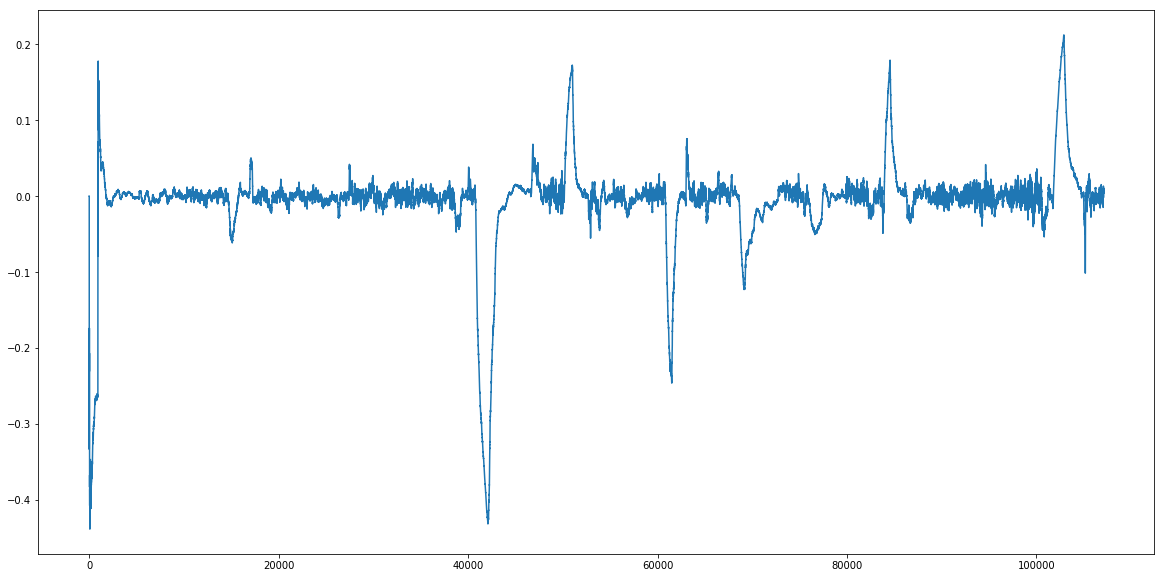

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
x = pd.Series(range(len(FULL_df)))

ax.plot(x, df['1day_delta'])#, x, FULL_df['neg_window_roc'], x, FULL_df['pos_window_roc'])

In [77]:
df['1day_delta'].max()

985

In [95]:
pos_sents = df[(df['pos_sent'] > df['pos_sent'].mean()) &
                    (df['neg_sent'] < df['neg_sent'].mean()) &
                    (df['1day_delta'] > 0.08)]

In [97]:
#pckl.dump(pos_sents, open('ARK_14_pos_sents.pckl','wb'))

In [96]:
len(pos_sents)

1350

In [179]:
days = 1
feats_df_forecast = day_windower.forecast(feats_df, days)

In [181]:
pckl.dump(feats_df_forecast, open('feats_df_w_reviews.pckl','wb'))

In [180]:
feats_only_df = feats_df_forecast.drop(columns = ['review'])

Index(['time_of_review', 'review', 'upvoted', 'time_of_review_unix',
       'percent_window', 'upvoted_roc', 'neu_window', 'neg_window',
       'pos_window', 'comp_window', 'neu_window_fullroc', 'neg_window_fullroc',
       'pos_window_fullroc', 'comp_window_fullroc', '1day_delta', '7day_delta',
       '1day_forcast'],
      dtype='object')

In [165]:
#columns = ['percent_window', 'neu_sent_roc', 'neg_sent_roc',
#       'pos_sent_roc', 'comp_sent_roc']

columns = ['upvoted_roc', 'upvote_roc_roc']

#columns = ['neg_window', 'pos_window']

plot_name = 'delete'

In [142]:
full_roc_df.columns

Index(['time_of_review', 'review', 'upvoted', 'time_of_review_unix',
       'minutes_played', 'upvotes_window', 'total_window', 'percent_window',
       'upvote_roc', 'neu_sent', 'neg_sent', 'pos_sent', 'comp_sent',
       'upvoted_roc', 'upvote_roc_roc', 'neu_sent_roc', 'neg_sent_roc',
       'pos_sent_roc', 'comp_sent_roc', 'neu_window', 'neg_window',
       'pos_window', 'comp_window'],
      dtype='object')

In [178]:
importlib.reload(day_windower)

<module 'day_windower' from '/Users/tylerblair/Documents/insight/day_windower.py'>

In [144]:
#roc_feats_df = day_windower.deriv_full_window(LSTM_full_df, params, columns)

In [169]:
feats_df = LSTM_full_df.drop(columns = ['minutes_played', 'total_window', 'upvote_roc',
                                       'neu_sent', 'neg_sent', 'pos_sent', 'comp_sent',
                                       'upvote_roc_roc', 'upvote_roc', 'upvotes_window',
                                       'neu_sent_roc', 'neg_sent_roc', 'pos_sent_roc',
                                       'comp_sent_roc'])

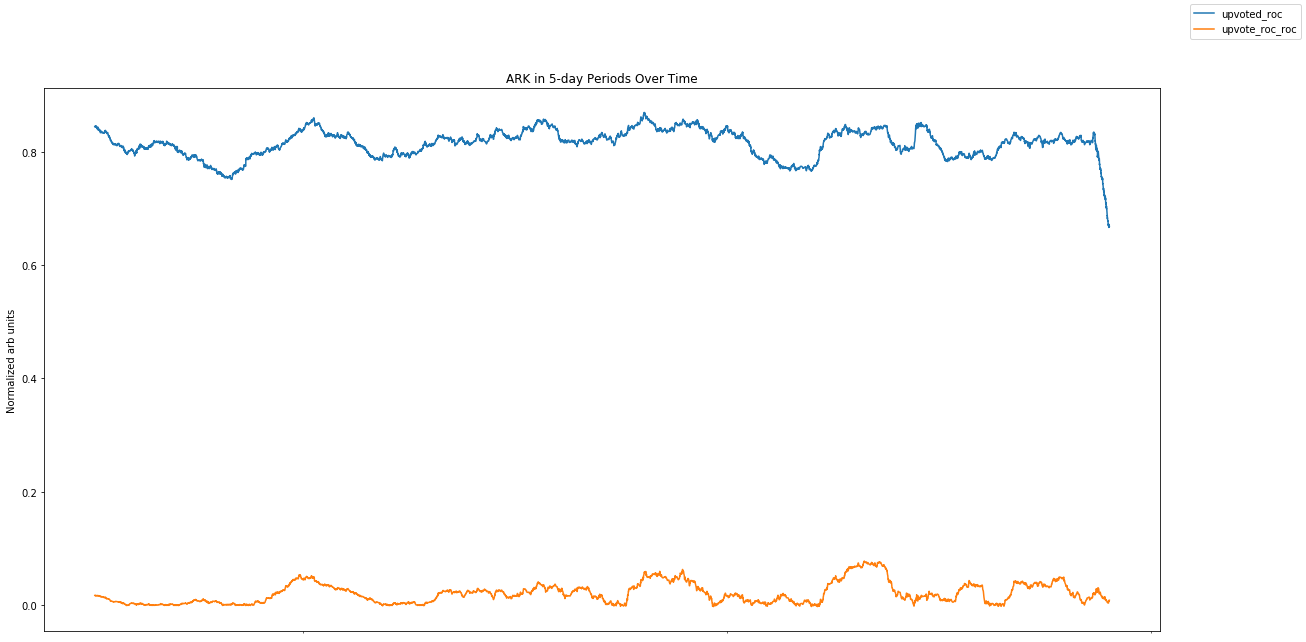

In [166]:
plot_reviews.plot(LSTM_full_df, params, columns, plot_name)

In [108]:
roc_df.head()

,time_of_review,review,upvoted,time_of_review_unix,minutes_played,upvotes_window,total_window,percent_window,upvote_roc,neu_sent,neg_sent,pos_sent,comp_sent,upvoted_roc,upvote_roc_roc,neu_sent_roc,neg_sent_roc,pos_sent_roc,comp_sent_roc
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,1.433284e+09,4578,1,1,1.0,0.0,0.801,0.000,0.199,0.5400,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1.433284e+09,28946,2,2,1.0,0.0,0.858,0.048,0.095,0.6476,0.541599,0.0,0.517172,0.000000,0.292290,0.410441
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,1.433284e+09,82165,3,3,1.0,0.0,0.247,0.000,0.753,0.7964,0.722132,0.0,0.714098,0.107083,0.287884,0.601778
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,1.433285e+09,664,4,4,1.0,0.0,0.812,0.036,0.152,0.7033,0.812399,0.0,0.615312,0.080312,0.768914,0.753996
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,1.433285e+09,43151,5,5,1.0,0.0,0.828,0.043,0.129,0.9728,0.866559,0.0,0.701959,0.112437,0.704434,0.817021


In [125]:
a = [1,2,3]
b = max(a)
c = pd.Series(a)/b
c

0    0.333333
1    0.666667
2    1.000000
dtype: float64

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [13]:
num_features = 1000
num_topics = 10

In [14]:
vectorizer = TfidfVectorizer(stop_words='english', 
                             max_features=num_features,
                             ngram_range=(1,2), 
                             max_df=0.9, min_df=3)

# use NMF model with the Frobenius norm
implement_nmf = NMF(n_components=num_topics,
                    random_state=1,
                    solver='mu',
                    beta_loss='frobenius')

In [16]:
neg_forecasts = pckl.load(open('neg_forecasts_14day.pckl','rb'))

In [20]:
vec = vectorizer.fit_transform(neg_forecasts['review'])

In [23]:
def display_topics(vectorizer, clf, W, df, n_top_words, n_top_documents):
    ''' Print out topics discovered by a model '''
    
    # get list of feature names
    feature_names = vectorizer.get_feature_names()
    
    # get VADER sentiment analyzer
    analyser      = SentimentIntensityAnalyzer()    
    
    # list of topics and reviews to return
    topics, reviews = [], []
    
    # loop over all the topics
    for topic_id, topic in enumerate(clf.components_):
        
        # grab the list of words describing the topic
        word_list = []
        for i in topic.argsort()[:-n_top_words - 1:-1]:
            word_list.append(feature_names[i])
        
        # split words in case there are some bigrams and get unique set
        split_list = []
        for word in word_list:
            for split in word.split():
                split_list.append(split)
        topic_words = list(set(split_list))
        
        # append topic words as a single string
        topics.append(' '.join([word for word in topic_words]))
        
        # print topic number and topic words
        print('Topic #%02d: %s' % (topic_id+1, topics[-1]))

        # loop over reviews for each topic
        top_doc_indices = np.argsort( W[:,topic_id] )[::-1][0:n_top_documents]
        for doc_index in top_doc_indices:

            # check that the review contains one of the topic words
            if any(word in df['reviewText'].iloc[doc_index].lower() for word in topic_words):
                
                # sentiment analysis
                vader = analyser.polarity_scores(df['reviewText'].iloc[doc_index])
                
                # append current review to the list 
                reviews.append(df.iloc[doc_index].to_dict())
                reviews[-1]['topic']       = topic_id
                reviews[-1]['topic_words'] = ' '.join([word for word in topic_words])
                reviews[-1]['sentiment']   = vader['compound']
                
                print('User %20s on %s with rating %s' % (df['reviewerName'].iloc[doc_index][:20], 
                                     df['reviewTime'].iloc[doc_index], df['overall'].iloc[doc_index]))            
                print("VADER: %f" % vader['compound'])
                print(reviews[-1]['reviewText'])
            else:
                print("WARNING: TOPIC NOT IN DOCUMENT")
            
        print()
        
    return topics, reviews

topics, reviews = display_topics(vectorizer, clf, transform, 
                                 test_df, n_top_words, n_top_documents)

['10',
 '10 10',
 '100',
 '1000',
 '1000 hours',
 '15',
 '20',
 '2015',
 '2016',
 '25',
 '30',
 '30 fps',
 '40',
 '50',
 '500',
 '55',
 '60',
 '60 fps',
 '70',
 '80',
 '8gb',
 '99',
 'ability',
 'able',
 'absolutely',
 'access',
 'access game',
 'access games',
 'action',
 'active',
 'actual',
 'actually',
 'add',
 'added',
 'addicting',
 'addictive',
 'adding',
 'adding new',
 'addition',
 'additional',
 'adds',
 'ago',
 'agree',
 'ai',
 'alive',
 'allow',
 'allowed',
 'alot',
 'alpha',
 'alpha tribes',
 'amazing',
 'amazing game',
 'amazing graphics',
 'amd',
 'ammount',
 'animals',
 'annoying',
 'anymore',
 'area',
 'aren',
 'ark',
 'ark great',
 'ark survival',
 'ask',
 'asking',
 'aspect',
 'aspects',
 'ass',
 'atleast',
 'attack',
 'available',
 'away',
 'awesome',
 'awesome game',
 'bad',
 'bad game',
 'balance',
 'barely',
 'base',
 'base game',
 'based',
 'bases',
 'basically',
 'battle',
 'beach',
 'beautiful',
 'beginning',
 'believe',
 'best',
 'best game',
 'best games',
 

In [12]:
import importlib
importlib.reload(windowing_function_vader)

<module 'windowing_function_vader' from '/Users/tylerblair/Documents/insight/windowing_function_vader.py'>

In [11]:
import windowing_function_vader

In [22]:
a = tokenized_df['tokenized_review'].iloc[0]
b = tokenized_df['review'].iloc[0]
print(a,'\n',b)

really good side cant force feed poo people yet 
 Its really good, only down side is you cant force feed poo to people yet!


In [14]:
pckl.dump(vader_df,open('ARK_7day_vader.pckl','wb'))

In [15]:
vader_df.head()

,time_of_review,review,upvoted,time_of_review_unix,minutes_played,upvotes_window,total_window,percent_window,norm_deriv,tokenized_review,neu_sent_nostop,neg_sent_nostop,pos_sent_nostop,comp_sent_nostop,neu_sent_raw,neg_sent_raw,pos_sent_raw,comp_sent_raw
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,1.433284e+09,4578,1,1,1.0,0.0,really good side cant force feed poo people yet,0.715,0.000,0.285,0.4927,0.801,0.000,0.199,0.5400
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1.433284e+09,28946,2,2,1.0,0.0,game manages make feel sorts emotions short am...,0.748,0.086,0.166,0.6124,0.858,0.048,0.095,0.6476
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,1.433284e+09,82165,3,3,1.0,0.0,love,0.000,0.000,1.000,0.6369,0.247,0.000,0.753,0.7964
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,1.433285e+09,664,4,4,1.0,0.0,point recommendation made ive played long easi...,0.657,0.000,0.343,0.7430,0.812,0.036,0.152,0.7033
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,1.433285e+09,43151,5,5,1.0,0.0,since *that game know vanished empty space din...,0.687,0.091,0.222,0.9646,0.828,0.043,0.129,0.9728


In [49]:
aaa = sentiment_df['comp_sent'].iloc[0:10]
type(aaa)

pandas.core.series.Series

In [50]:
bbb = (aaa - aaa.shift(1)).fillna(value=0)

In [52]:
bbb[0:2]

0    0.0000
1    0.1076
Name: comp_sent, dtype: float64

In [46]:
ccc.append(bbb).fillna(value=0)

0    0.000
1    0.033
2   -0.748
3    0.657
4    0.030
5   -0.228
6   -0.010
7    0.118
8   -0.194
9    0.627
dtype: float64

In [69]:
columns = ['a', 'b', 'c', 'd']

In [73]:
plot_list = []

for column in columns:
    plot_list.append(' date, ' + column)

plot_string = ','.join(plot_list)

In [77]:
plot_string.strip()

'date, a, date, b, date, c, date, d'